# Plotting ARISE Atmosphere data using contourf

In [1]:
#import statements
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
#%matplotlib inline
#import matplotlib as mpl
#from matplotlib import colorbar
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature  # features such as the ocean, coastlines
#import os #Double check in a bit for the timeseries, average file
import math
import cmocean

In [2]:
def k_to_c(k_deg):  #Convert data drom degrees K to degrees C
    return k_deg - 273.15

In [3]:
#Open the ARISE data
path = '/glade/campaign/cesm/collections/ARISE-SAI-1.5/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.001/atm/proc/tseries/day_1/'
ts = xr.open_mfdataset(path+'b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.001.cam.h1.TS.*' + '.nc')

In [4]:
ts

<xarray.Dataset>
Dimensions:       (ilev: 71, lat: 192, lev: 70, lon: 288, nbnd: 2, time: 12775)
Coordinates:
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * lev           (lev) float64 5.96e-06 9.827e-06 1.62e-05 ... 976.3 992.6
  * ilev          (ilev) float64 4.5e-06 7.42e-06 1.223e-05 ... 985.1 1e+03
  * time          (time) object 2035-01-01 00:00:00 ... 2069-12-31 00:00:00
Dimensions without coordinates: nbnd
Data variables:
    gw            (time, lat) float64 dask.array<chunksize=(3650, 192), meta=np.ndarray>
    hyam          (time, lev) float64 dask.array<chunksize=(3650, 70), meta=np.ndarray>
    hybm          (time, lev) float64 dask.array<chunksize=(3650, 70), meta=np.ndarray>
    P0            (time) float64 1e+05 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    hyai          (time, ilev) float64 dask.array<chunksize=(3650, 71), meta=np.ndarray>
    hybi          (time, ilev) float64 dask.array<chunksize=(3650, 71), meta=np.ndarray>
    ndbase        (time) int32 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    nsbase        (time) int32 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    nbdate        (time) int32 20350101 20350101 20350101 ... 20350101 20350101
    nbsec         (time) int32 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    mdt           (time) int32 1800 1800 1800 1800 1800 ... 1800 1800 1800 1800
    date          (time) int32 dask.array<chunksize=(3650,), meta=np.ndarray>
    datesec       (time) int32 dask.array<chunksize=(3650,), meta=np.ndarray>
    time_bnds     (time, nbnd) object dask.array<chunksize=(3650, 2), meta=np.ndarray>
    date_written  (time) |S8 dask.array<chunksize=(3650,), meta=np.ndarray>
    time_written  (time) |S8 dask.array<chunksize=(3650,), meta=np.ndarray>
    ndcur         (time) int32 dask.array<chunksize=(3650,), meta=np.ndarray>
    nscur         (time) int32 dask.array<chunksize=(3650,), meta=np.ndarray>
    co2vmr        (time) float64 dask.array<chunksize=(3650,), meta=np.ndarray>
    ch4vmr        (time) float64 dask.array<chunksize=(3650,), meta=np.ndarray>
    n2ovmr        (time) float64 dask.array<chunksize=(3650,), meta=np.ndarray>
    f11vmr        (time) float64 dask.array<chunksize=(3650,), meta=np.ndarray>
    f12vmr        (time) float64 dask.array<chunksize=(3650,), meta=np.ndarray>
    sol_tsi       (time) float64 dask.array<chunksize=(3650,), meta=np.ndarray>
    nsteph        (time) int32 dask.array<chunksize=(3650,), meta=np.ndarray>
    TS            (time, lat, lon) float32 dask.array<chunksize=(3650, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.001
    logname:           geostrat
    host:              cheyenne5
    initial_file:      b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.001.c...
    topography_file:   /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/fv_0.9x1...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  day_1

In [5]:
#Take the mean of the Data
long_term_mean = np.mean(k_to_c(ts['TS']),axis=0)

In [6]:
levels=np.arange(-60,40,5)

/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


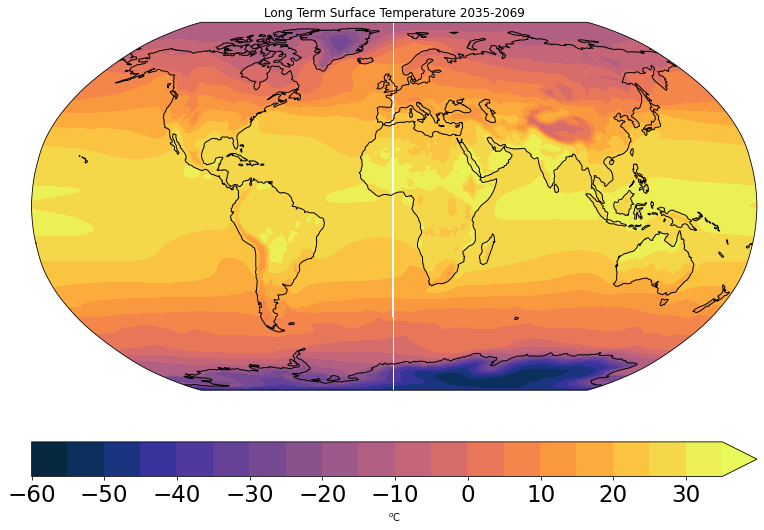

In [7]:
##Plotting: Arise 2069, longest days below freezing,global
x = ts['lon']
y = ts['lat']
plot = long_term_mean

fig,ax= plt.subplots(figsize =(13,19),subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0))) # defining a figure
title = 'Long Term Surface Temperature 2035-2069'
plt.title(title)
#ax.add_feature(cfeature.LAND, color = 'lightgray',zorder = 1) #adding land
ax.add_feature(cfeature.COASTLINE,zorder = 1) #adding a coastline
ax.set_global()  

#plot the data
p = ax.contourf(x, y,plot,levels,extend='max',
                transform=ccrs.PlateCarree(),cmap=cmocean.cm.thermal)

cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax,extend='max') # add a colorbar
cbar.ax.tick_params(labelsize=23) #change the size of the ticks on the colorbar
cbar.set_label('$^o$C')

plt.show() 
plt.close()


## Remove the white line in the middle

In [8]:
long_term_mean, lon = add_cyclic_point(long_term_mean, coord=ts['lon'])

/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


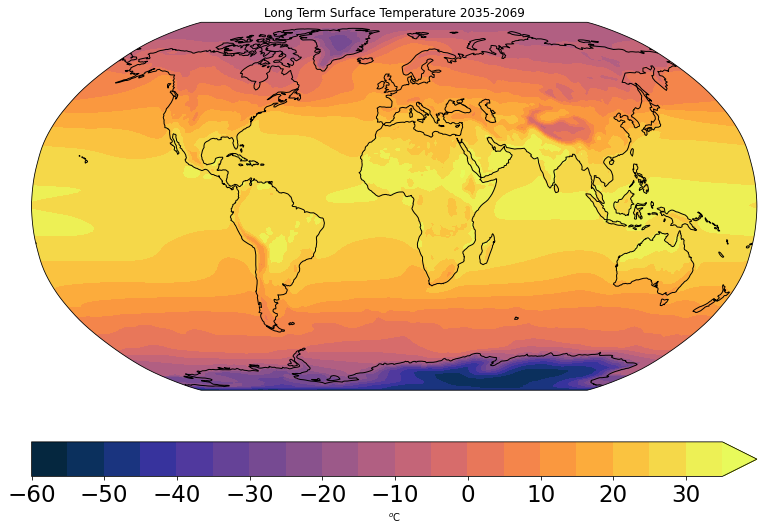

In [9]:
##Plotting: Arise 2069, longest days below freezing,global
x = lon
y = ts['lat']
plot = long_term_mean

fig,ax= plt.subplots(figsize =(13,19),subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0))) # defining a figure
title = 'Long Term Surface Temperature 2035-2069'
plt.title(title)
#ax.add_feature(cfeature.LAND, color = 'lightgray',zorder = 1) #adding land
ax.add_feature(cfeature.COASTLINE,zorder = 1) #adding a coastline
ax.set_global()  

#plot the data
p = ax.contourf(x, y,plot,levels,extend='max',
                transform=ccrs.PlateCarree(),cmap=cmocean.cm.thermal)

cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax,extend='max') # add a colorbar
cbar.ax.tick_params(labelsize=23) #change the size of the ticks on the colorbar
cbar.set_label('$^o$C')

plt.show() 
plt.close()
